# predicting the soil features
### author: Sourasish Mondal

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score



rc = {
    "font.family": 'serif',
}

sns.set(rc=rc)

## Loading the dataset

In [8]:
df = pd.read_excel('./soil_data.xlsx')
df.head().style.set_properties(**{'background-color': 'black', 'color': 'white', 'border-color': '#8b8c8c'})

,ID,Sand %,Clay %,Silt %,pH,EC mS/cm,O.M. %,CACO3 %,N_NO3 ppm,P ppm,K ppm,Mg ppm,Fe ppm,Zn ppm,Mn ppm,Cu ppm,B ppm
0,1,42.000000,38.000000,20.000000,5.162000,0.274000,3.783414,0.000000,14.462366,18.608840,147,1115,91.320000,0.894000,27.060000,1.768000,0.400000
1,2,54.000000,26.000000,20.000000,6.071000,0.355000,1.451688,0.000000,14.587814,32.742137,180,1055,60.040000,3.660000,17.580000,1.684000,0.410000
2,3,28.000000,36.000000,36.000000,6.921000,0.675000,1.767599,0.400000,14.910394,19.024525,183,1215,61.240000,3.060000,18.000000,1.840000,0.460000
3,4,58.000000,20.000000,22.000000,7.704000,0.355000,0.718322,6.800000,4.211470,6.276846,116,327,19.540000,1.640000,5.040000,0.844000,0.500000
4,5,33.200000,41.200000,25.600000,7.609000,0.392000,0.996625,4.390000,6.111111,6.553970,228,939,25.840000,0.180000,7.160000,1.216000,0.400000


In [11]:
df.describe().style.background_gradient(cmap='viridis', axis=1)

,ID,Sand %,Clay %,Silt %,pH,EC mS/cm,O.M. %,CACO3 %,N_NO3 ppm,P ppm,K ppm,Mg ppm,Fe ppm,Zn ppm,Mn ppm,Cu ppm,B ppm
count,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,780.000000,781.000000,781.000000
mean,391.000000,31.529321,34.997183,33.473496,7.133668,0.452793,2.028909,13.422049,11.623384,13.840659,296.226633,821.025608,31.203376,0.674741,15.870457,2.031440,0.383825
std,225.599572,10.978371,11.252452,8.384172,0.897823,0.304841,0.627244,13.381635,11.052054,14.586017,194.461073,742.228950,26.013791,0.680825,15.169155,2.455702,0.222067
min,1.000000,10.000000,6.000000,14.000000,4.490000,0.134000,0.370000,0.000000,0.180000,1.070000,31.000000,60.000000,4.630000,0.100000,2.380000,0.210000,0.100000
25%,196.000000,24.000000,28.000000,28.000000,6.660000,0.338000,1.590000,1.800000,5.280000,5.730000,169.000000,364.000000,13.210000,0.310000,6.749250,1.080000,0.230000
50%,391.000000,30.000000,36.000000,32.000000,7.550000,0.404000,1.960000,8.710000,8.850000,9.490000,255.000000,568.000000,19.870000,0.480000,10.105000,1.480000,0.350000
75%,586.000000,38.000000,44.000000,38.000000,7.780000,0.497000,2.370000,22.000000,14.310000,15.980000,358.000000,1010.000000,43.150000,0.771000,19.162500,2.130000,0.480000
max,781.000000,70.000000,64.000000,68.000000,8.200000,5.621000,4.980000,77.600000,120.640000,152.420000,1665.000000,4836.000000,187.940000,7.090000,189.210000,33.910000,1.900000


## only Mn has one null value

In [17]:
print(df.isnull().sum())
print(df.shape)

ID           0
Sand %       0
Clay %       0
Silt %       0
pH           0
EC mS/cm     0
O.M. %       0
CACO3 %      0
N_NO3 ppm    0
P ppm        0
K ppm        0
Mg ppm       0
Fe ppm       0
Zn ppm       0
Mn ppm       1
Cu ppm       0
B ppm        0
dtype: int64
(781, 17)


In [24]:
data = df.drop('ID', axis="columns")

In [26]:
data.dropna()

,Sand %,Clay %,Silt %,pH,EC mS/cm,O.M. %,CACO3 %,N_NO3 ppm,P ppm,K ppm,Mg ppm,Fe ppm,Zn ppm,Mn ppm,Cu ppm,B ppm
0,42.0,38.0,20.0,5.162,0.274,3.783414,0.00,14.462366,18.608840,147,1115,91.32,0.894,27.060,1.768,0.40
1,54.0,26.0,20.0,6.071,0.355,1.451688,0.00,14.587814,32.742137,180,1055,60.04,3.660,17.580,1.684,0.41
2,28.0,36.0,36.0,6.921,0.675,1.767599,0.40,14.910394,19.024525,183,1215,61.24,3.060,18.000,1.840,0.46
3,58.0,20.0,22.0,7.704,0.355,0.718322,6.80,4.211470,6.276846,116,327,19.54,1.640,5.040,0.844,0.50
4,33.2,41.2,25.6,7.609,0.392,0.996625,4.39,6.111111,6.553970,228,939,25.84,0.180,7.160,1.216,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,26.0,46.0,28.0,6.720,0.454,2.080000,0.00,7.660000,20.670000,395,500,38.07,0.394,26.480,1.468,0.33
777,40.0,28.0,32.0,7.790,0.343,1.380000,30.00,5.200000,4.140000,286,154,12.79,0.241,6.328,0.603,0.12
778,34.0,28.0,38.0,7.630,1.135,1.870000,24.30,17.130000,6.900000,582,164,10.73,0.439,5.390,1.141,0.26
779,16.0,38.0,46.0,7.730,0.393,1.720000,46.30,3.920000,7.930000,335,572,11.61,0.263,3.770,2.195,0.27


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sand %     781 non-null    float64
 1   Clay %     781 non-null    float64
 2   Silt %     781 non-null    float64
 3   pH         781 non-null    float64
 4   EC mS/cm   781 non-null    float64
 5   O.M. %     781 non-null    float64
 6   CACO3 %    781 non-null    float64
 7   N_NO3 ppm  781 non-null    float64
 8   P ppm      781 non-null    float64
 9   K ppm      781 non-null    int64  
 10  Mg ppm     781 non-null    int64  
 11  Fe ppm     781 non-null    float64
 12  Zn ppm     781 non-null    float64
 13  Mn ppm     780 non-null    float64
 14  Cu ppm     781 non-null    float64
 15  B ppm      781 non-null    float64
dtypes: float64(14), int64(2)
memory usage: 97.8 KB


## Drawing the graphs for understanding

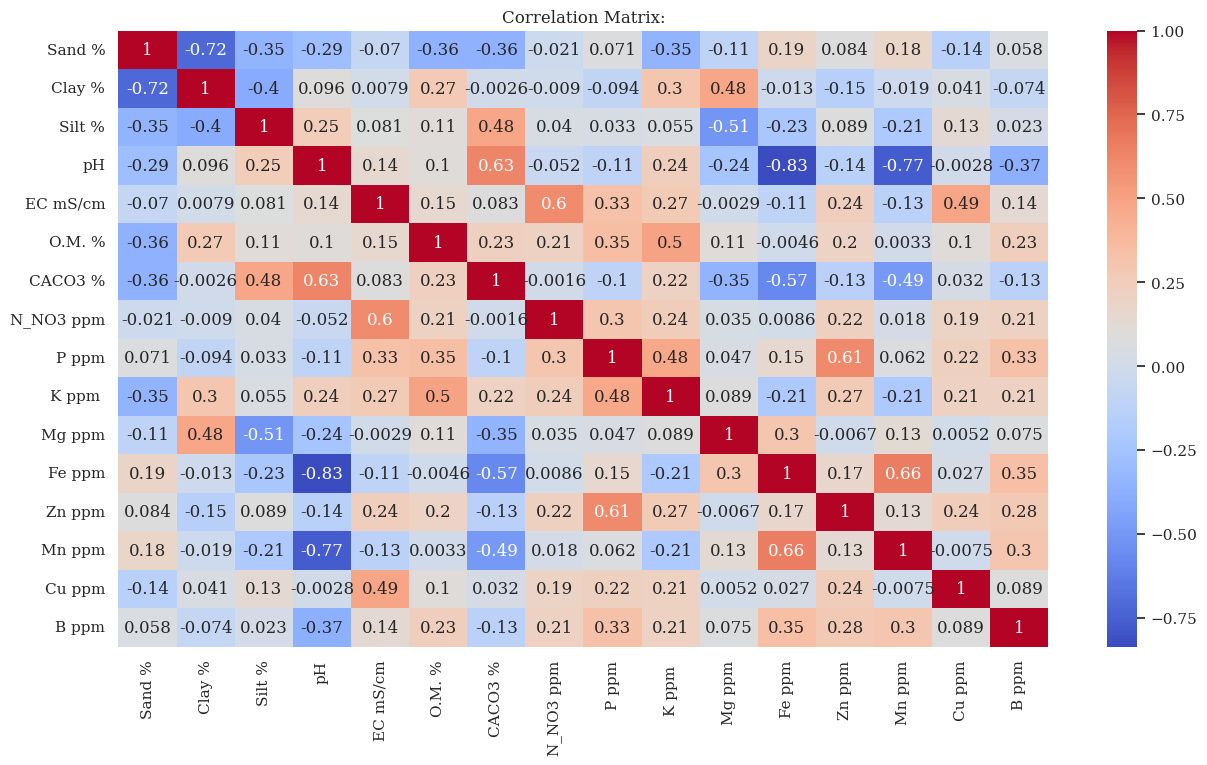

In [35]:
# correlation matrix
corr_mat = data.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix:")
plt.show()

## Plotting the Iron Graph

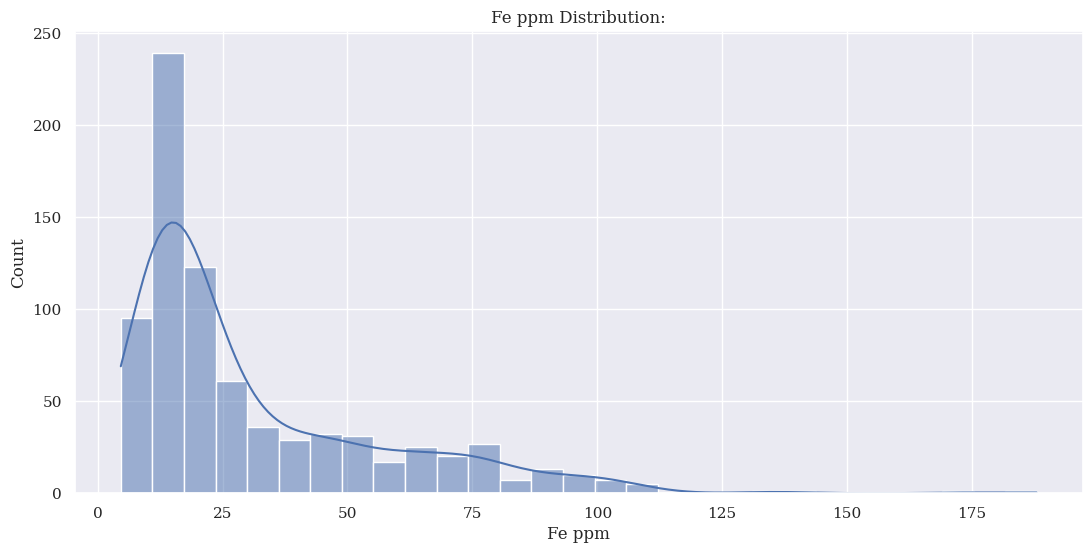

In [41]:
plt.figure(figsize=(13, 6))
sns.histplot(data['Fe ppm'], kde=True)
plt.title("Fe ppm Distribution:")
plt.show()


## Plotting the Phosphorus Graph

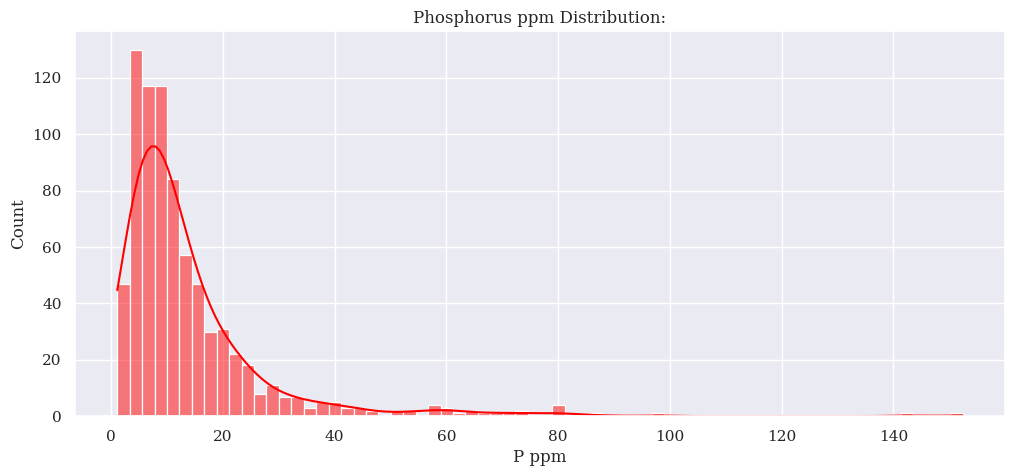

In [46]:
plt.figure(figsize=(12, 5))
sns.histplot(data['P ppm'], kde=True, color='red')
plt.title("Phosphorus ppm Distribution:")
plt.show()

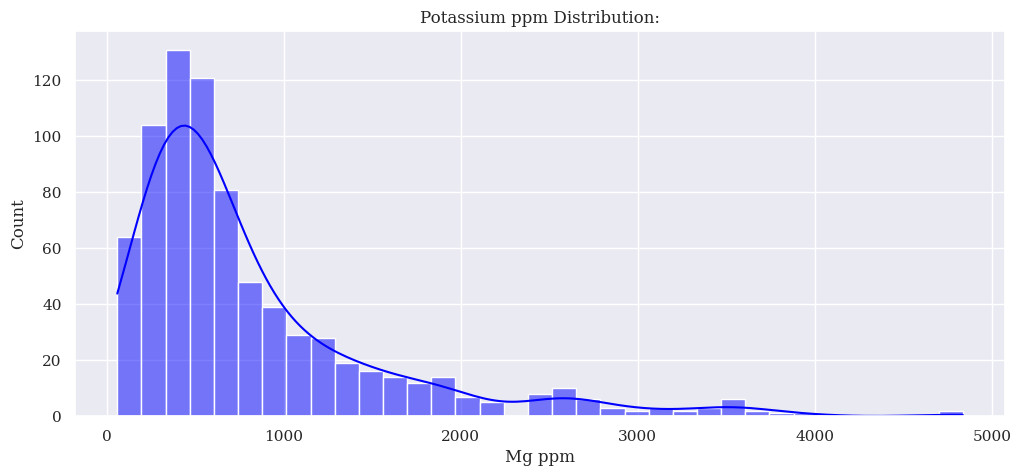

In [49]:
plt.figure(figsize=(12, 5))
sns.histplot(data['Mg ppm'], kde=True, color='blue')
plt.title("Magnesium ppm Distribution:")
plt.show()

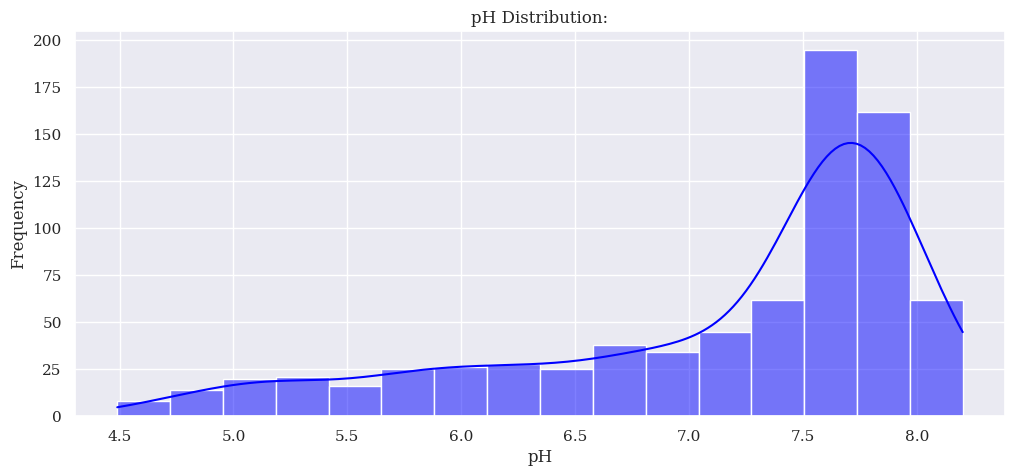

In [50]:
plt.figure(figsize=(12, 5))
sns.histplot(data['pH'], kde=True, color='blue')
plt.title("pH Distribution:")
plt.ylabel("Frequency")
plt.show()

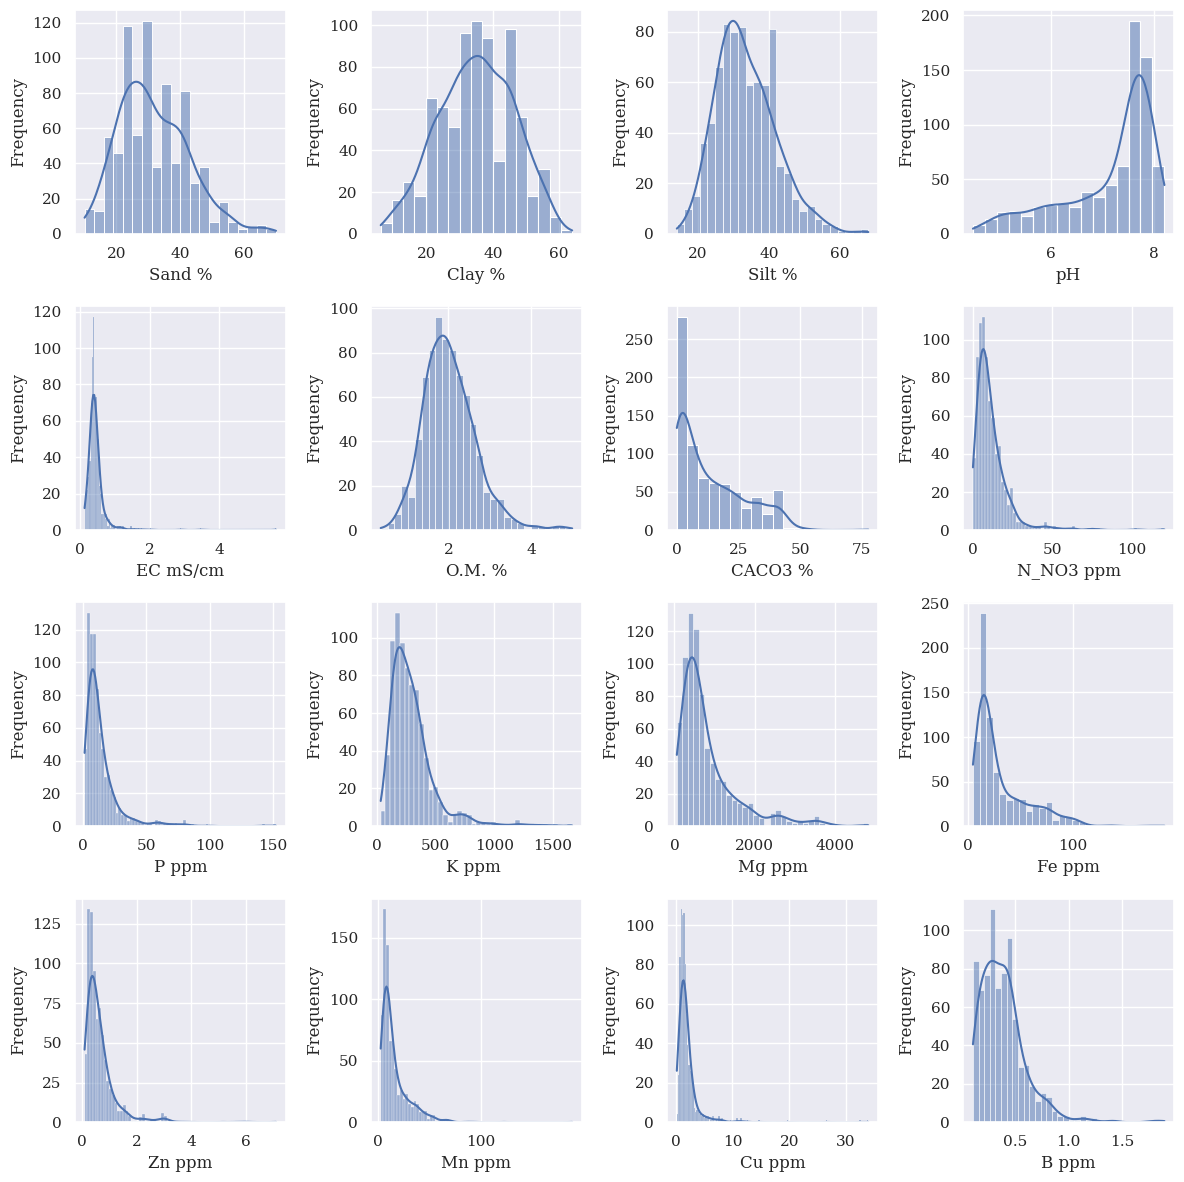

In [54]:
fig, axes = plt.subplots(4, 4, figsize=(12, 12))

axes = axes.flatten();

for i, j in enumerate(data.columns):
    sns.histplot(data[j], kde=True, ax=axes[i])
    axes[i].set_xlabel(j);
    axes[i].set_ylabel('Frequency');

plt.tight_layout()
plt.show()


In [57]:
# using z-score normalization
scaler = StandardScaler()

# fitting the dataa
scaled_data = scaler.fit_transform(data)

# convert the data to dataframe
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)

scaled_data.head()

,Sand %,Clay %,Silt %,pH,EC mS/cm,O.M. %,CACO3 %,N_NO3 ppm,P ppm,K ppm,Mg ppm,Fe ppm,Zn ppm,Mn ppm,Cu ppm,B ppm
0,0.954366,0.267030,-1.608046,-2.197462,-0.586888,2.798959,-1.003663,0.257038,0.327110,-0.767877,0.396324,2.312433,0.322255,0.738124,-0.107345,0.072887
1,2.048125,-0.800088,-1.608046,-1.184364,-0.321005,-0.920839,-1.003663,0.268396,1.296693,-0.598069,0.315434,1.109223,4.387575,0.112771,-0.141574,0.117947
2,-0.321686,0.089177,0.301535,-0.237023,0.729397,-0.416867,-0.973752,0.297602,0.355627,-0.582632,0.531139,1.155382,3.505727,0.140476,-0.078007,0.343249
3,2.412711,-1.333646,-1.369348,0.635645,-0.321005,-2.090777,-0.495178,-0.671066,-0.518898,-0.927394,-0.666024,-0.448641,1.418686,-0.714437,-0.483854,0.523491
4,0.152277,0.551595,-0.939692,0.529766,-0.199552,-1.646801,-0.675391,-0.499075,-0.499887,-0.351075,0.159048,-0.206306,-0.727144,-0.574590,-0.332273,0.072887


## plotting the scaled data

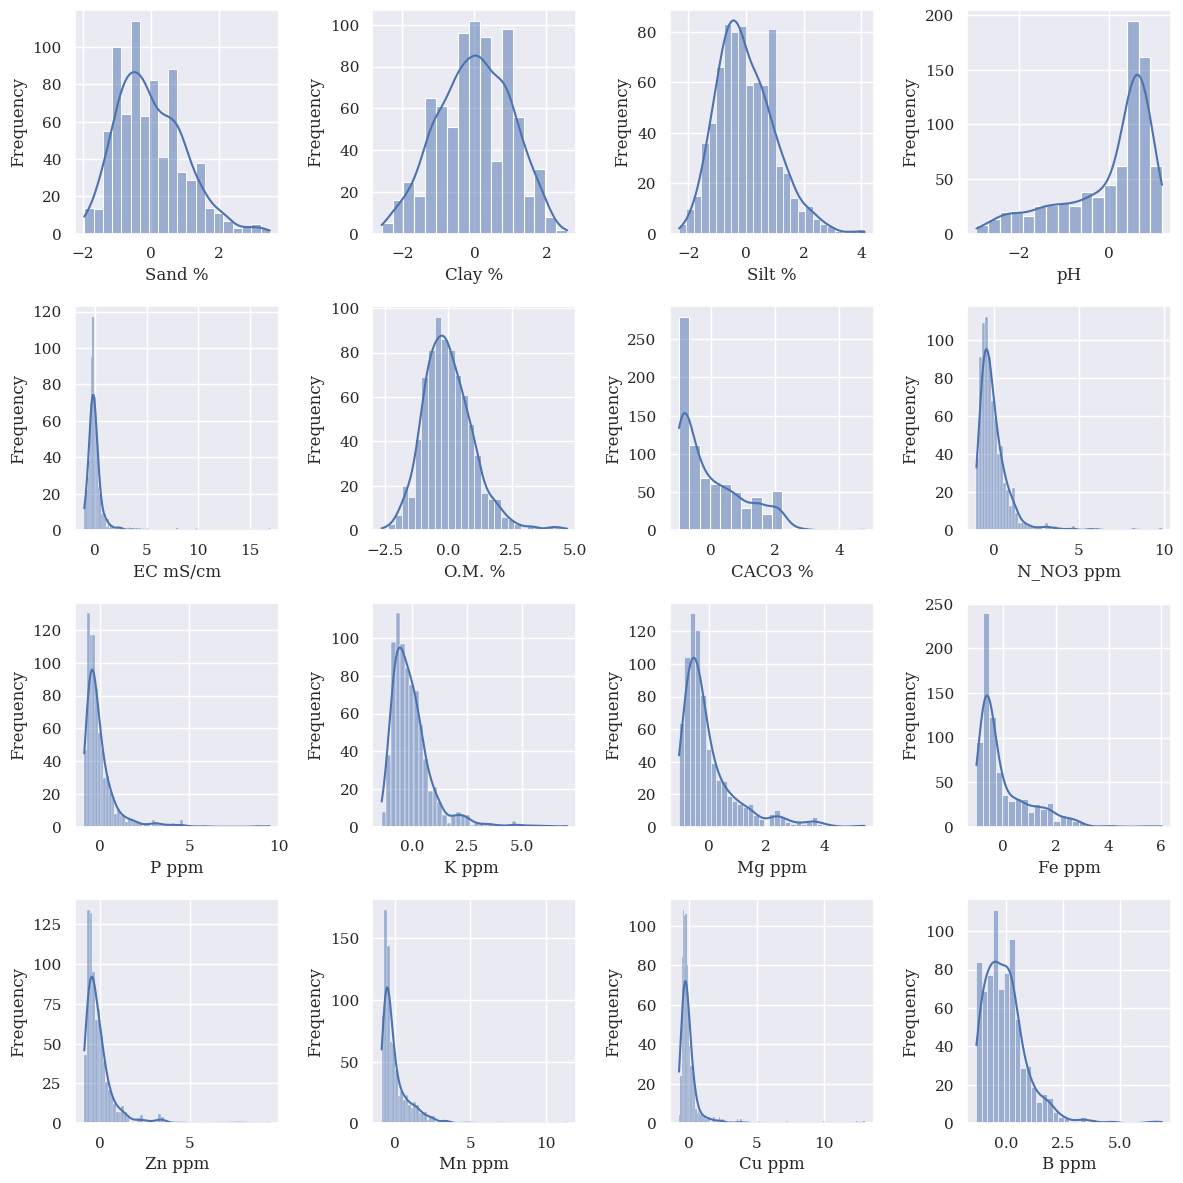

In [59]:
fig, axes = plt.subplots(4, 4, figsize=(12, 12))

axes = axes.flatten();

for i, j in enumerate(scaled_data.columns):
    sns.histplot(scaled_data[j], kde=True, ax=axes[i])
    axes[i].set_xlabel(j);
    axes[i].set_ylabel('Frequency');

plt.tight_layout()
plt.show()


In [60]:
X = scaled_data[['Sand %', 'Clay %', 'Silt %', 'pH', 'EC mS/cm', 'O.M. %', 'CACO3 %', 'N_NO3 ppm', 'K ppm ', 'Mg ppm', 'Fe ppm', 'Zn ppm', 'Mn ppm', 'Cu ppm', 'B ppm']]
Y = scaled_data['P ppm']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [61]:
from sklearn.linear_model import LinearRegression


model = LinearRegression();
model.fit(X_train, Y_train)

LinearRegression()

In [69]:
for features, coeff in zip(X.columns, model.coef_):
    print(f'{features}: {coeff:.4f}');



Sand %: 0.0923
Clay %: -0.1033
Silt %: 0.0177
pH: -0.0058
EC mS/cm: 0.1946
O.M. %: 0.1425
CACO3 %: -0.0760
N_NO3 ppm: 0.0289
K ppm : 0.3292
Mg ppm: 0.0164
Fe ppm: 0.1093
Zn ppm: 0.4062
Mn ppm: -0.0288
Cu ppm: -0.0798
B ppm: 0.0290


In [70]:
imputer = SimpleImputer(strategy='mean')

X_test_imputed = imputer.fit_transform(X_test)
y_pred = model.predict(X_test_imputed)
print(y_pred)

[ 1.14869608e-01 -2.09770078e-01  1.42806451e-01 -2.91677088e-01
 -1.77569706e-01  7.38866930e-01 -4.92427405e-01 -4.50451292e-02
  3.36860822e+00 -6.65412464e-01 -3.01245624e-01 -4.07023266e-01
 -2.92358909e-02  3.00152434e-01 -1.42032497e-01 -2.50297308e-01
  2.44911174e-01  8.82668266e-03  1.07567060e+00  3.15008646e-01
 -9.62193989e-02 -3.12778031e-01 -2.15728173e-01  1.08300022e+00
 -6.54989998e-01 -5.41563596e-01  2.04391775e+00 -2.72569973e-01
 -1.47129417e-01 -2.98477984e-01 -3.79823923e-01 -3.73250262e-01
  1.02517470e-01 -2.43886667e-01 -2.35085321e-01  4.03735881e-01
 -9.06916679e-02  1.09738367e+00 -3.15934676e-01 -2.14604581e-01
 -6.12622013e-01 -5.32626822e-01  1.60357106e+00 -7.74450464e-01
  1.43396616e-01 -5.95442188e-02 -5.11576848e-01 -6.29024794e-01
  1.25563214e-01  1.79759292e-01 -4.55507234e-01  9.05694978e-01
  1.21804349e-02  2.88279960e-01 -1.65029014e+00 -5.97470737e-01
  4.25635444e-01  2.22936314e-01  1.20987579e+00 -3.20151502e-01
  1.40281060e+00 -4.02715

/opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Removing the rows with missing values

In [71]:
X_test_cleaned = X_test.dropna()
Y_test_cleaned = Y_test[X_test_cleaned.index]

y_pred = model.predict(X_test_cleaned)

In [77]:


mse = mean_squared_error(Y_test_cleaned, y_pred)
print("The means squared error is: ", mse);
r_squared = r2_score(Y_test_cleaned, y_pred)
print("The R squared value is: ", r_squared);
print("The root mean squared error is:", np.sqrt(mse))

The means squared error is:  0.3664969809422369
The R squared value is:  0.6328659181869047
The root mean squared error is: 0.6053899412298134
